### Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans,DBSCAN,HDBSCAN
from sklearn.cluster import SpectralClustering
from sklearn.metrics import silhouette_score
from sklearn.metrics import  adjusted_rand_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#### Load the DataSet

In [2]:
df = pd.read_csv('NYPD_Shooting_Incident_Data__Historic_.csv')

In [3]:
df.head()

,INCIDENT_KEY,OCCUR_DATE,OCCUR_TIME,BORO,LOC_OF_OCCUR_DESC,PRECINCT,JURISDICTION_CODE,LOC_CLASSFCTN_DESC,LOCATION_DESC,STATISTICAL_MURDER_FLAG,...,PERP_SEX,PERP_RACE,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lon_Lat
0,228798151,05/27/2021,21:30:00,QUEENS,NaN,105,0.0,NaN,NaN,False,...,NaN,NaN,18-24,M,BLACK,1.058925e+06,180924.000000,40.662965,-73.730839,POINT (-73.73083868899994 40.662964620000025)
1,137471050,06/27/2014,17:40:00,BRONX,NaN,40,0.0,NaN,NaN,False,...,NaN,NaN,18-24,M,BLACK,1.005028e+06,234516.000000,40.810352,-73.924942,POINT (-73.92494232599995 40.81035186300006)
2,147998800,11/21/2015,03:56:00,QUEENS,NaN,108,0.0,NaN,NaN,True,...,NaN,NaN,25-44,M,WHITE,1.007668e+06,209836.531250,40.742607,-73.915492,POINT (-73.91549174199997 40.74260663300004)
3,146837977,10/09/2015,18:30:00,BRONX,NaN,44,0.0,NaN,NaN,False,...,NaN,NaN,<18,M,WHITE HISPANIC,1.006537e+06,244511.140625,40.837782,-73.919457,POINT (-73.91945661499994 40.83778200300003)
4,58921844,02/19/2009,22:58:00,BRONX,NaN,47,0.0,NaN,NaN,True,...,M,BLACK,45-64,M,BLACK,1.024922e+06,262189.406250,40.886238,-73.852910,POINT (-73.85290950899997 40.88623791800006)


In [4]:
df.tail()

,INCIDENT_KEY,OCCUR_DATE,OCCUR_TIME,BORO,LOC_OF_OCCUR_DESC,PRECINCT,JURISDICTION_CODE,LOC_CLASSFCTN_DESC,LOCATION_DESC,STATISTICAL_MURDER_FLAG,...,PERP_SEX,PERP_RACE,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lon_Lat
27307,245029823,05/14/2022,03:02:00,BRONX,OUTSIDE,48,0.0,STREET,(null),False,...,(null),(null),18-24,M,BLACK,1011526.0,247828.0,40.846864,-73.901413,POINT (-73.90141321 40.84686352)
27308,239583450,01/22/2022,13:15:00,MANHATTAN,OUTSIDE,30,0.0,STREET,(null),False,...,F,WHITE HISPANIC,25-44,M,WHITE HISPANIC,997458.0,240485.0,40.826743,-73.952273,POINT (-73.952273 40.826743)
27309,246825728,06/18/2022,03:29:00,MANHATTAN,OUTSIDE,32,0.0,STREET,(null),False,...,M,BLACK,25-44,M,BLACK,1000999.0,234464.0,40.810209,-73.939496,POINT (-73.9394955 40.81020941)
27310,246876579,06/19/2022,20:08:00,BRONX,INSIDE,46,2.0,HOUSING,MULTI DWELL - PUBLIC HOUS,False,...,M,BLACK,25-44,M,WHITE HISPANIC,1012980.0,251028.0,40.855644,-73.896141,POINT (-73.896141 40.855644)
27311,239861542,01/28/2022,18:14:00,BRONX,OUTSIDE,45,0.0,STREET,(null),False,...,M,BLACK,18-24,M,BLACK,1026549.0,244293.0,40.837102,-73.847134,POINT (-73.847134 40.837102)


In [5]:
df.shape

(27312, 21)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27312 entries, 0 to 27311
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   INCIDENT_KEY             27312 non-null  int64  
 1   OCCUR_DATE               27312 non-null  object 
 2   OCCUR_TIME               27312 non-null  object 
 3   BORO                     27312 non-null  object 
 4   LOC_OF_OCCUR_DESC        1716 non-null   object 
 5   PRECINCT                 27312 non-null  int64  
 6   JURISDICTION_CODE        27310 non-null  float64
 7   LOC_CLASSFCTN_DESC       1716 non-null   object 
 8   LOCATION_DESC            12335 non-null  object 
 9   STATISTICAL_MURDER_FLAG  27312 non-null  bool   
 10  PERP_AGE_GROUP           17968 non-null  object 
 11  PERP_SEX                 18002 non-null  object 
 12  PERP_RACE                18002 non-null  object 
 13  VIC_AGE_GROUP            27312 non-null  object 
 14  VIC_SEX               

In [7]:
df.describe()

,INCIDENT_KEY,PRECINCT,JURISDICTION_CODE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude
count,2.731200e+04,27312.000000,27310.000000,2.731200e+04,27312.000000,27302.000000,27302.000000
mean,1.208605e+08,65.635362,0.326913,1.009449e+06,208127.401608,40.737892,-73.909051
std,7.341286e+07,27.305705,0.737743,1.837783e+04,31886.377757,0.087525,0.066272
min,9.953245e+06,1.000000,0.000000,9.149281e+05,125756.718750,40.511586,-74.249303
25%,6.386088e+07,44.000000,0.000000,1.000029e+06,182834.335938,40.668481,-73.943027
50%,9.037222e+07,68.000000,0.000000,1.007731e+06,194486.570312,40.700318,-73.915221
75%,1.888102e+08,81.000000,0.000000,1.016838e+06,239518.468750,40.824067,-73.882330
max,2.611902e+08,123.000000,2.000000,1.066815e+06,271127.687500,40.910818,-73.702046


### Make a copy of the DataSet

In [8]:
data = df.copy(deep = True)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27312 entries, 0 to 27311
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   INCIDENT_KEY             27312 non-null  int64  
 1   OCCUR_DATE               27312 non-null  object 
 2   OCCUR_TIME               27312 non-null  object 
 3   BORO                     27312 non-null  object 
 4   LOC_OF_OCCUR_DESC        1716 non-null   object 
 5   PRECINCT                 27312 non-null  int64  
 6   JURISDICTION_CODE        27310 non-null  float64
 7   LOC_CLASSFCTN_DESC       1716 non-null   object 
 8   LOCATION_DESC            12335 non-null  object 
 9   STATISTICAL_MURDER_FLAG  27312 non-null  bool   
 10  PERP_AGE_GROUP           17968 non-null  object 
 11  PERP_SEX                 18002 non-null  object 
 12  PERP_RACE                18002 non-null  object 
 13  VIC_AGE_GROUP            27312 non-null  object 
 14  VIC_SEX               

#### Check If there are any null (Missing) values

In [10]:
data.isnull().sum()

INCIDENT_KEY                   0
OCCUR_DATE                     0
OCCUR_TIME                     0
BORO                           0
LOC_OF_OCCUR_DESC          25596
PRECINCT                       0
JURISDICTION_CODE              2
LOC_CLASSFCTN_DESC         25596
LOCATION_DESC              14977
STATISTICAL_MURDER_FLAG        0
PERP_AGE_GROUP              9344
PERP_SEX                    9310
PERP_RACE                   9310
VIC_AGE_GROUP                  0
VIC_SEX                        0
VIC_RACE                       0
X_COORD_CD                     0
Y_COORD_CD                     0
Latitude                      10
Longitude                     10
Lon_Lat                       10
dtype: int64

In [11]:
data.duplicated().sum()

0

In [12]:
data.columns

Index(['INCIDENT_KEY', 'OCCUR_DATE', 'OCCUR_TIME', 'BORO', 'LOC_OF_OCCUR_DESC',
       'PRECINCT', 'JURISDICTION_CODE', 'LOC_CLASSFCTN_DESC', 'LOCATION_DESC',
       'STATISTICAL_MURDER_FLAG', 'PERP_AGE_GROUP', 'PERP_SEX', 'PERP_RACE',
       'VIC_AGE_GROUP', 'VIC_SEX', 'VIC_RACE', 'X_COORD_CD', 'Y_COORD_CD',
       'Latitude', 'Longitude', 'Lon_Lat'],
      dtype='object')

In [13]:
data.columns.values

array(['INCIDENT_KEY', 'OCCUR_DATE', 'OCCUR_TIME', 'BORO',
       'LOC_OF_OCCUR_DESC', 'PRECINCT', 'JURISDICTION_CODE',
       'LOC_CLASSFCTN_DESC', 'LOCATION_DESC', 'STATISTICAL_MURDER_FLAG',
       'PERP_AGE_GROUP', 'PERP_SEX', 'PERP_RACE', 'VIC_AGE_GROUP',
       'VIC_SEX', 'VIC_RACE', 'X_COORD_CD', 'Y_COORD_CD', 'Latitude',
       'Longitude', 'Lon_Lat'], dtype=object)

#### Drop Unnessesary Columns

In [14]:
data = data.drop(['INCIDENT_KEY','PRECINCT','LOC_OF_OCCUR_DESC','LOC_CLASSFCTN_DESC','LOCATION_DESC','JURISDICTION_CODE','PERP_AGE_GROUP','PERP_SEX','PERP_RACE','X_COORD_CD','Y_COORD_CD','Longitude','Lon_Lat'],axis=1)


In [15]:
categoricals12 = ['Latitude']

for column in categoricals12:
    # Fill with the mean value
    data[column] = data[column].fillna(data[column].mean())

In [16]:
def correct_date_format(date_str):
    # Try the common format first
    try:
        return pd.to_datetime(date_str, format='%d-%m-%Y')
    except ValueError:
        # If that fails, try the alternate format
        return pd.to_datetime(date_str, format='%m/%d/%Y')

# Apply the correction function to each date
data['OCCUR_DATE'] = data['OCCUR_DATE'].apply(correct_date_format)
data['OCCUR_TIME'] = pd.to_datetime(data['OCCUR_TIME'])

In [17]:
data['year'] = data['OCCUR_DATE'].dt.year
data['month'] = data['OCCUR_DATE'].dt.month
data['day'] = data['OCCUR_DATE'].dt.day
data['hour'] = data['OCCUR_TIME'].dt.hour
data['minute'] = data['OCCUR_TIME'].dt.minute
data['second'] = data['OCCUR_TIME'].dt.second

# Drop the original datetime column
data = data.drop(columns=['OCCUR_DATE'])
data = data.drop(columns=['OCCUR_TIME'])
#drop the first few rows of the preprocessed dataset
data.head()

,BORO,STATISTICAL_MURDER_FLAG,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,Latitude,year,month,day,hour,minute,second
0,QUEENS,False,18-24,M,BLACK,40.662965,2021,5,27,21,30,0
1,BRONX,False,18-24,M,BLACK,40.810352,2014,6,27,17,40,0
2,QUEENS,True,25-44,M,WHITE,40.742607,2015,11,21,3,56,0
3,BRONX,False,<18,M,WHITE HISPANIC,40.837782,2015,10,9,18,30,0
4,BRONX,True,45-64,M,BLACK,40.886238,2009,2,19,22,58,0


#### Check again if there are any missing values

In [18]:
data.isnull().sum()

BORO                       0
STATISTICAL_MURDER_FLAG    0
VIC_AGE_GROUP              0
VIC_SEX                    0
VIC_RACE                   0
Latitude                   0
year                       0
month                      0
day                        0
hour                       0
minute                     0
second                     0
dtype: int64

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27312 entries, 0 to 27311
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   BORO                     27312 non-null  object 
 1   STATISTICAL_MURDER_FLAG  27312 non-null  bool   
 2   VIC_AGE_GROUP            27312 non-null  object 
 3   VIC_SEX                  27312 non-null  object 
 4   VIC_RACE                 27312 non-null  object 
 5   Latitude                 27312 non-null  float64
 6   year                     27312 non-null  int32  
 7   month                    27312 non-null  int32  
 8   day                      27312 non-null  int32  
 9   hour                     27312 non-null  int32  
 10  minute                   27312 non-null  int32  
 11  second                   27312 non-null  int32  
dtypes: bool(1), float64(1), int32(6), object(4)
memory usage: 1.7+ MB


# Exploratory Data Analysis (EDA)

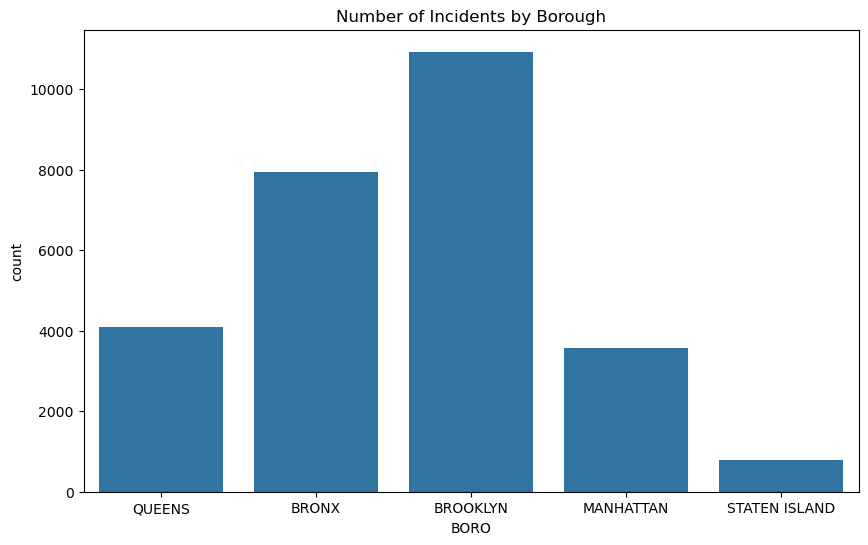

In [20]:
plt.figure(figsize=(10, 6))
sns.countplot(x='BORO', data=data)
plt.title('Number of Incidents by Borough')
plt.show()

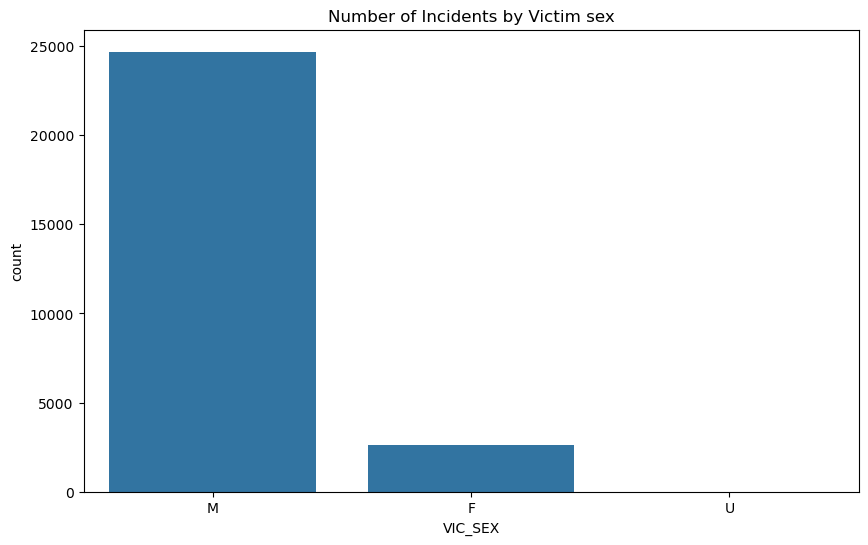

In [21]:
'Victim sex'
plt.figure(figsize=(10, 6))
sns.countplot(x='VIC_SEX', data=data)
plt.title('Number of Incidents by Victim sex')
plt.show()

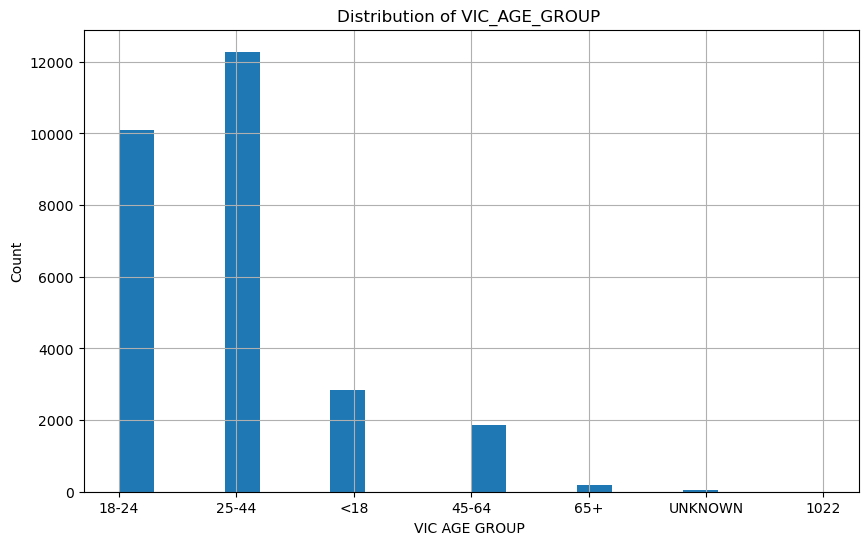

In [22]:
'Victim age group'
plt.figure(figsize=(10, 6))
data['VIC_AGE_GROUP'].hist(bins=20)
plt.title('Distribution of VIC_AGE_GROUP ')
plt.xlabel('VIC AGE GROUP ')
plt.ylabel('Count')
plt.show()

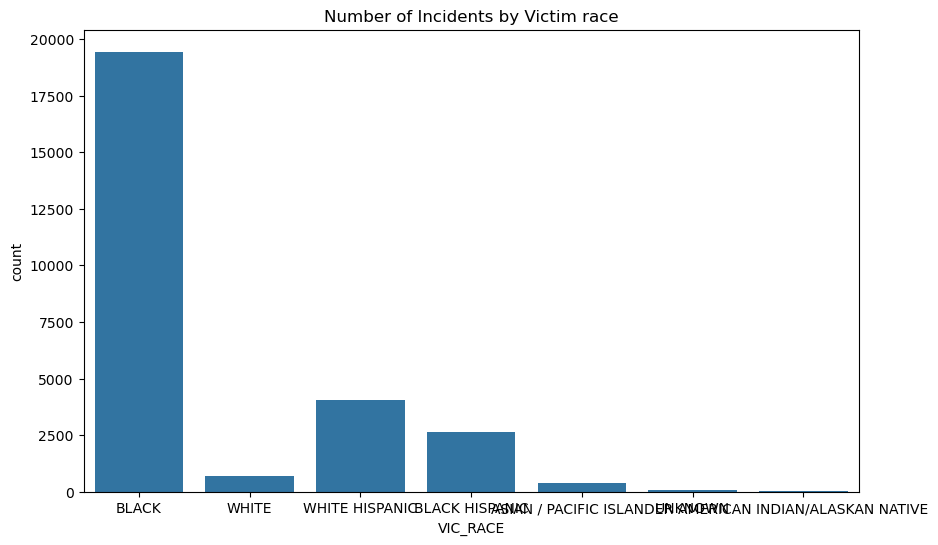

In [23]:
'Victim race'
plt.figure(figsize=(10, 6))
sns.countplot(x='VIC_RACE', data=data)
plt.title('Number of Incidents by Victim race')
plt.show()

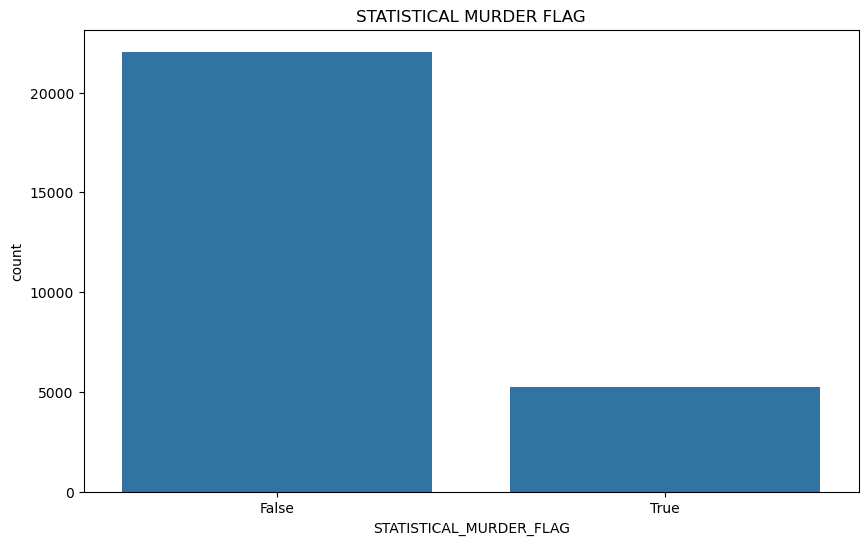

In [24]:
'Statistical murder flag'
plt.figure(figsize=(10, 6))
sns.countplot(x='STATISTICAL_MURDER_FLAG', data=data)
plt.title('STATISTICAL MURDER FLAG')
plt.show()

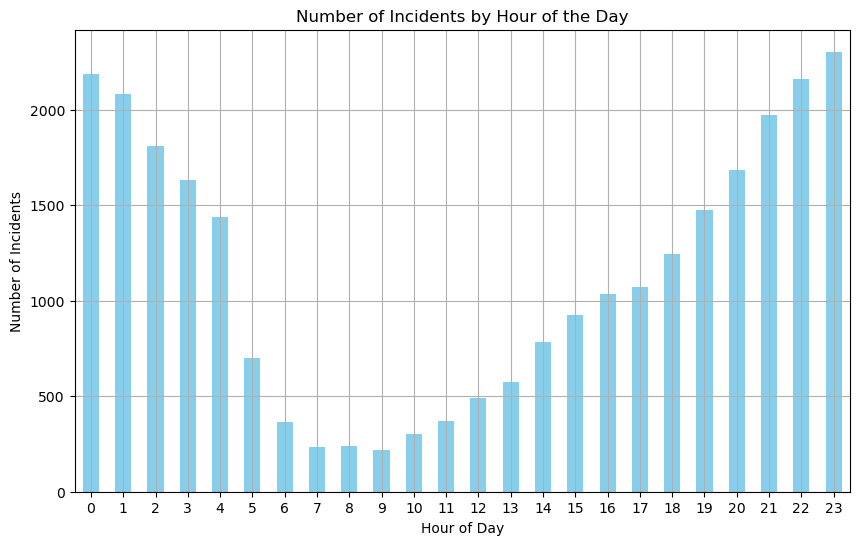

In [25]:
# Plot the distribution of incidents by hour
plt.figure(figsize=(10, 6))
data['hour'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Number of Incidents by Hour of the Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

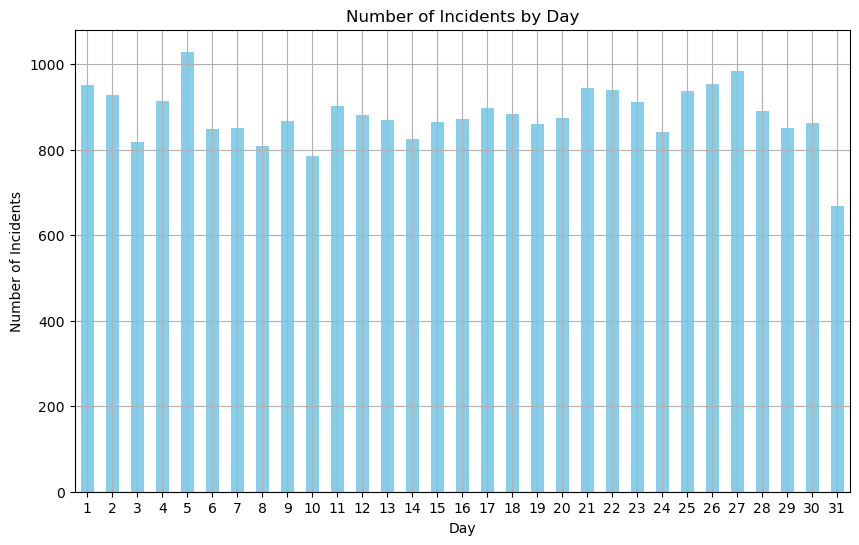

In [26]:
# Plot the distribution of incidents by day
plt.figure(figsize=(10, 6))
data['day'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Number of Incidents by Day')
plt.xlabel('Day')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

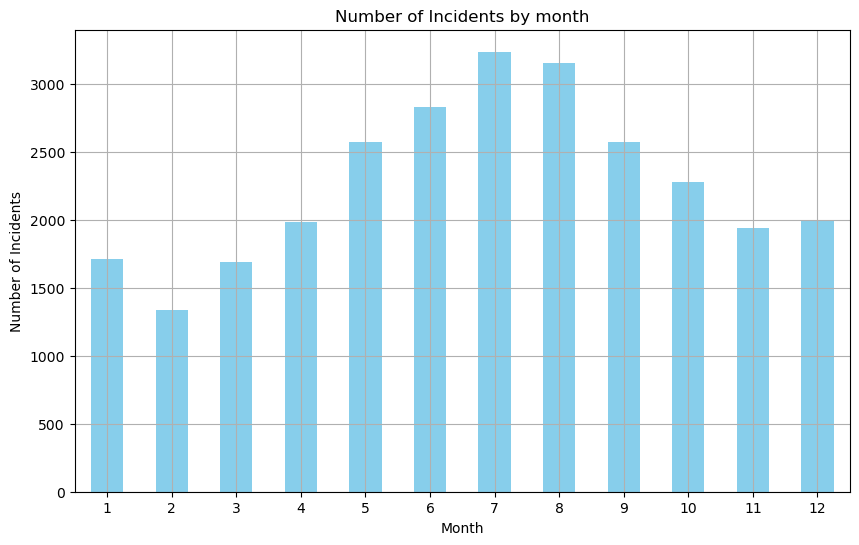

In [27]:
# Plot the distribution of incidents by month
plt.figure(figsize=(10, 6))
data['month'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Number of Incidents by month')
plt.xlabel('Month')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

<Figure size 1000x600 with 0 Axes>

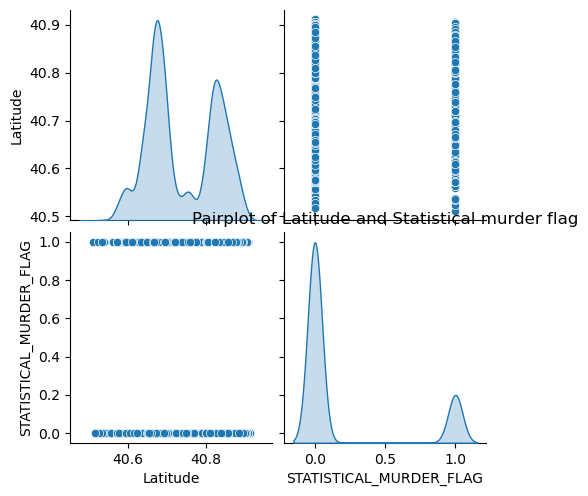

In [28]:
# Pairplot for selected numerical columns
plt.figure(figsize=(10, 6))
sns.pairplot(data[['Latitude','STATISTICAL_MURDER_FLAG']], diag_kind='kde')
plt.title('Pairplot of Latitude and Statistical murder flag')
plt.show()

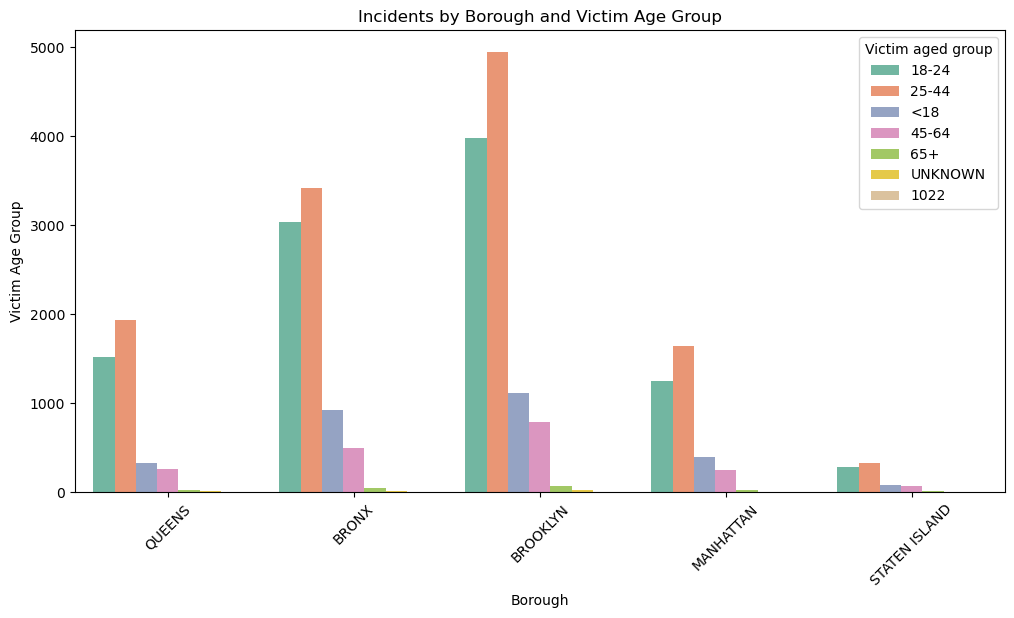

In [29]:
# Borough vs Victim's Age Group
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='BORO', hue='VIC_AGE_GROUP', palette='Set2')
plt.title('Incidents by Borough and Victim Age Group')
plt.xlabel('Borough')
plt.ylabel('Victim Age Group')
plt.xticks(rotation=45)
plt.legend(title='Victim aged group')
plt.show()

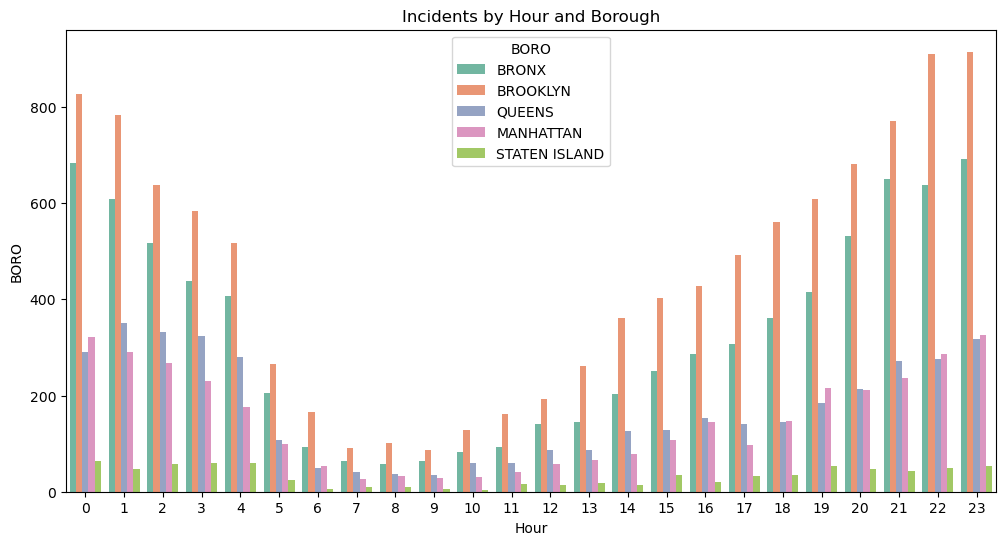

In [30]:
# Time (Hour) vs Borough
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='hour', hue='BORO', palette='Set2')
plt.title('Incidents by Hour and Borough')
plt.xlabel('Hour')
plt.ylabel('BORO')
plt.show()

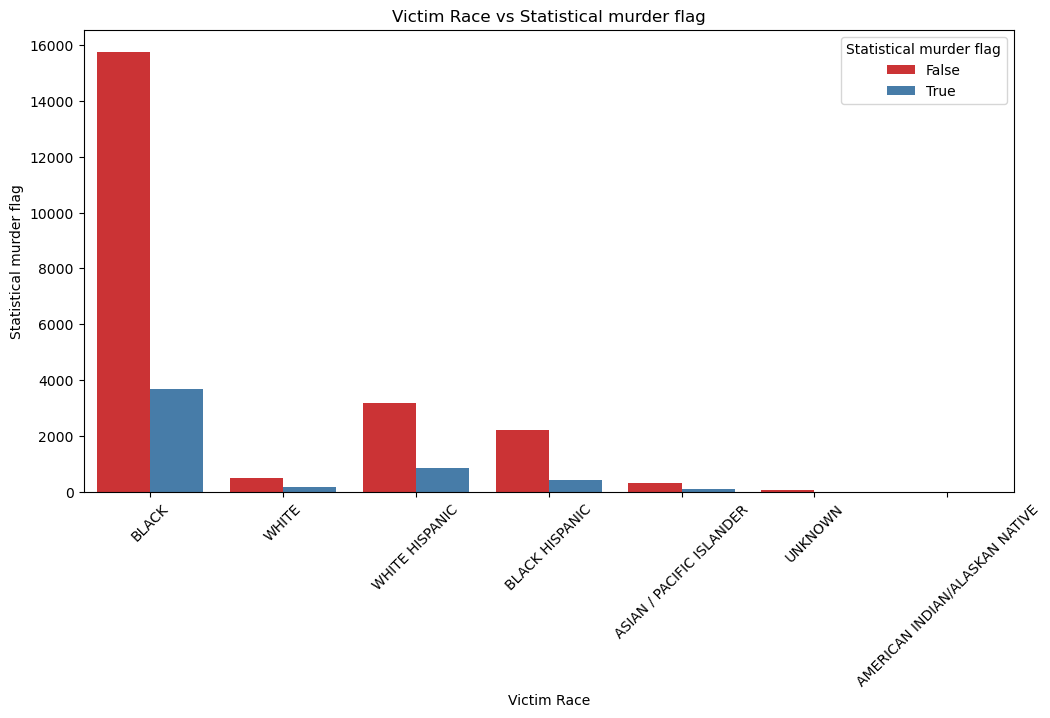

In [31]:
# Victim's Race vs Statistical murder flag
plt.figure(figsize=(12, 6))
sns.countplot(data= data, x='VIC_RACE', hue='STATISTICAL_MURDER_FLAG', palette='Set1')
plt.title('Victim Race vs Statistical murder flag')
plt.xlabel('Victim Race')
plt.ylabel('Statistical murder flag')
plt.xticks(rotation=45)
plt.legend(title='Statistical murder flag')
plt.show()

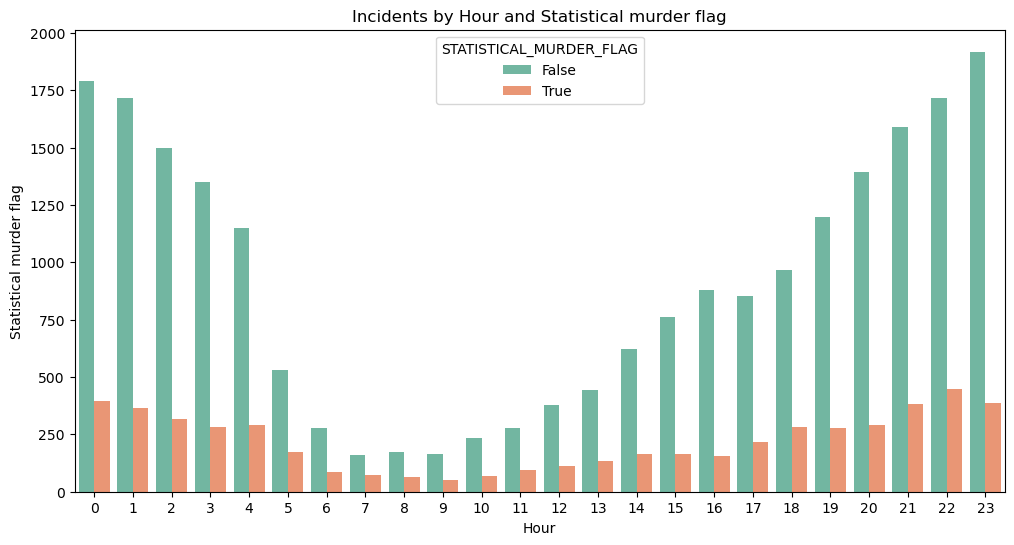

In [32]:
# Time (Hour) vs Statistical murder flag
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='hour', hue='STATISTICAL_MURDER_FLAG', palette='Set2')
plt.title('Incidents by Hour and Statistical murder flag')
plt.xlabel('Hour')
plt.ylabel('Statistical murder flag')
plt.show()

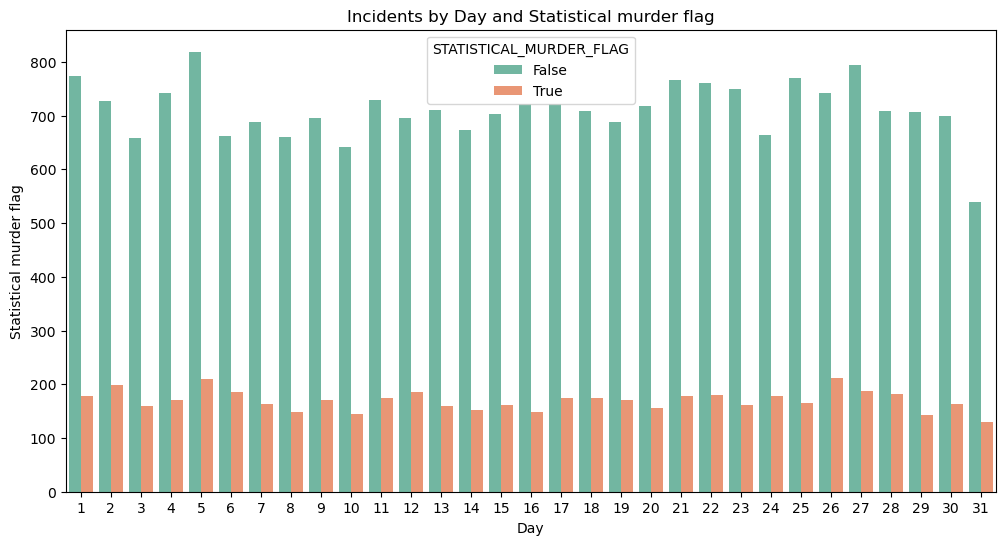

In [33]:
# Day vs Statistical murder flag
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='day', hue='STATISTICAL_MURDER_FLAG', palette='Set2')
plt.title('Incidents by Day and Statistical murder flag')
plt.xlabel('Day')
plt.ylabel('Statistical murder flag')
plt.show()

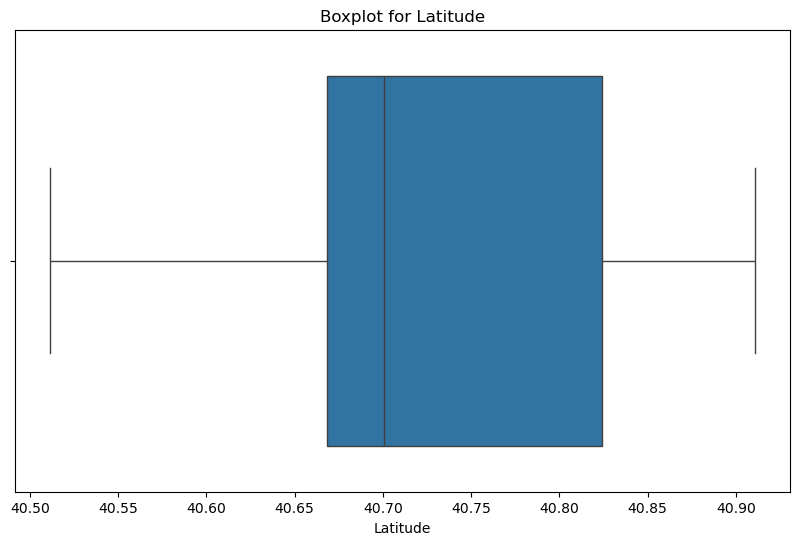

In [34]:
# Boxplot to detect outliers for 'Latitude'
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['Latitude'])
plt.title('Boxplot for Latitude')
plt.show()

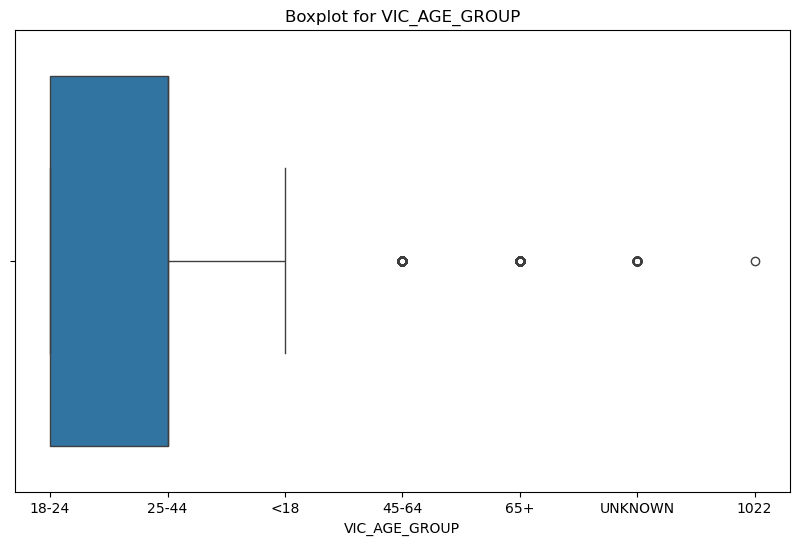

In [35]:
# Boxplot to detect outliers for 'VIC_AGE_GROUP'
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['VIC_AGE_GROUP'])
plt.title('Boxplot for VIC_AGE_GROUP')
plt.show()

In [36]:
# Encode categorical variables using LabelEncoder
categorical_cols = ['BORO','STATISTICAL_MURDER_FLAG','VIC_AGE_GROUP', 'VIC_SEX', 'VIC_RACE']
le = LabelEncoder()
for col in categorical_cols:
    data[col] = le.fit_transform(data[col])

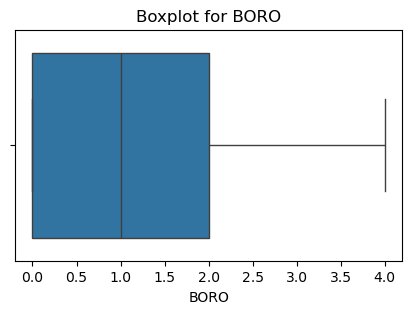

In [37]:
# Boxplot to detect outliers for 'BORO'
plt.figure(figsize=(5,3))
sns.boxplot(x=data['BORO'])
plt.title('Boxplot for BORO')
plt.show()

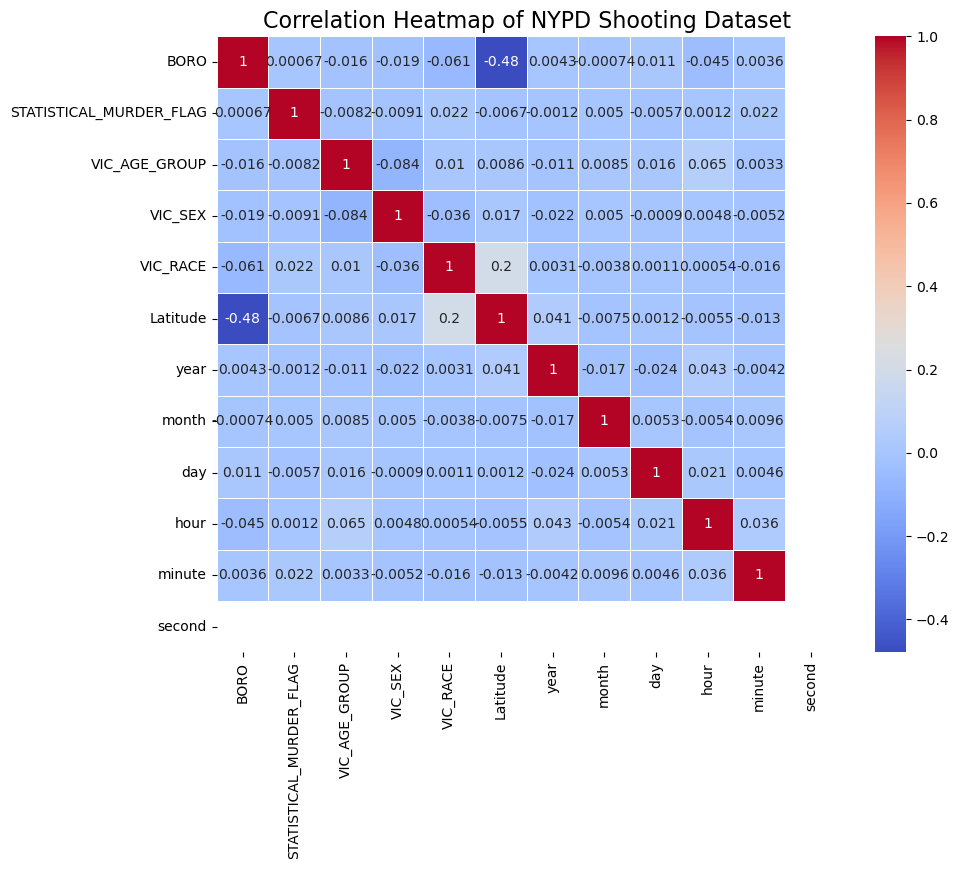

In [38]:
# Compute the correlation matrix for numerical columns
correlation_matrix = data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Adding title
plt.title('Correlation Heatmap of NYPD Shooting Dataset', fontsize=16)

# Show the plot
plt.show()

## Machine Learnig Model Development

In [39]:
scaler = StandardScaler()
Df12 = scaler.fit_transform(data)

In [40]:
# Range of k values to try
k_values = range(2, 11)
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(data)
    silhouette_avg = silhouette_score(data, cluster_labels)
    silhouette_scores.append(silhouette_avg)

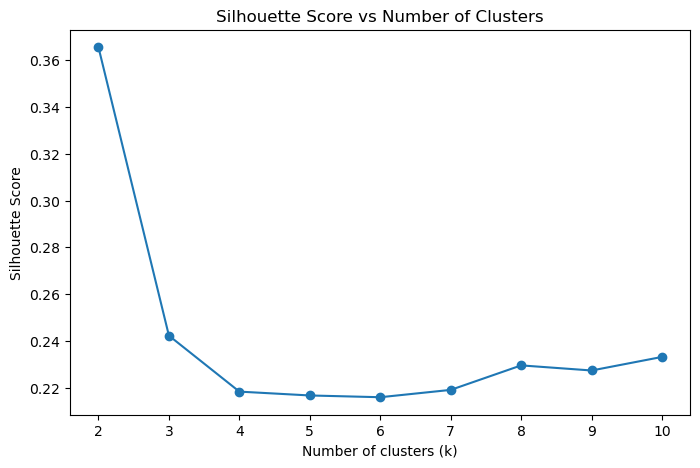

In [41]:
# Plot Silhouette Score for each k
plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_scores, '-o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Number of Clusters')
plt.show()

In [42]:
# Define a custom scoring function using silhouette score
def silhouette_scorer(estimator, X):
    cluster_labels = estimator.fit_predict(X)
    return silhouette_score(X, cluster_labels)

In [43]:
# Define the hyperparameters grid to search
param_grid = {
    'n_clusters': [2, 3, 4, 5, 6, 7],
    'init': ['k-means++', 'random'],
    'max_iter': [50,100, 300, 500],
    'n_init': [10, 20, 30],
    'tol': [1e-4, 1e-3, 1e-2]
}

In [44]:

# Create the KMeans model
kmeans = KMeans(random_state=42)


In [45]:
# Setup the grid search
grid_search = GridSearchCV(estimator=kmeans, param_grid=param_grid,
                           scoring=make_scorer(silhouette_scorer), cv=3)


In [46]:
# Perform the grid search
grid_search.fit(data)

GridSearchCV(cv=3, estimator=KMeans(random_state=42),
             param_grid={'init': ['k-means++', 'random'],
                         'max_iter': [50, 100, 300, 500],
                         'n_clusters': [2, 3, 4, 5, 6, 7],
                         'n_init': [10, 20, 30], 'tol': [0.0001, 0.001, 0.01]},
             scoring=make_scorer(silhouette_scorer, response_method='predict'))

In [47]:
# Output the best parameters
print("Best Parameters: ", grid_search.best_params_)

Best Parameters:  {'init': 'k-means++', 'max_iter': 50, 'n_clusters': 2, 'n_init': 10, 'tol': 0.0001}


In [48]:
pca = PCA(n_components=2)  # Reduce to 2 dimensions
df12 = pca.fit_transform(data) #fitting to the model

In [49]:
# Apply KMeans with the best parameters
kmeans = KMeans(
    n_clusters=2,        # Best number of clusters
    init='k-means++',     # Best initialization method
    max_iter=10,         # Maximum iterations
    n_init=5,            # Number of times to run the algorithm with different centroid seeds
    tol=0.001,           # Convergence tolerance
    random_state=42       # Set random state for reproducibility
)


# Fit the model to the scaled data
kmeans.fit(df12)
data['Cluster'] = kmeans.fit_predict(df12)

# Step 6: Evaluate the clustering using silhouette score
silhouette_avg = silhouette_score(df12, data['Cluster'])
print(f'Silhouette Score for {2} clusters: {silhouette_avg}')

Silhouette Score for 2 clusters: 0.47848441293641886


In [50]:
# Sample DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=4)
dbscan_labels = dbscan.fit_predict(data)
data['DBSCAN_Cluster'] = dbscan_labels

# Define the check_stability function
def check_stability(model, data):
    """
    Function to check the stability of a clustering model.
    It returns the silhouette score and Adjusted Rand Index (ARI),
    while filtering out the noise points (-1).
    """
    # Filter out the noise points (those labeled as -1)
    clustered_data = data[data['DBSCAN_Cluster'] != -1]

    # Check if there are still points left after filtering out noise
    if len(clustered_data) == 0:
        print("All points are noise. Stability cannot be calculated.")
        return -1, -1

    # Extract feature data (excluding cluster labels)
    features = clustered_data.drop(columns=['DBSCAN_Cluster'])
    labels = clustered_data['DBSCAN_Cluster']

    # Silhouette Score (only calculate if there are at least 2 clusters)
    if len(set(labels)) > 1:
        silhouette_avg = silhouette_score(features, labels)
    else:
        silhouette_avg = -1  # Invalid score, less than 2 clusters

    # Adjusted Rand Index (ARI) between original and a second DBSCAN run
    second_dbscan = DBSCAN(eps=1.5, min_samples=4).fit(features)
    ari_score = adjusted_rand_score(labels, second_dbscan.labels_)

    return silhouette_avg, ari_score
# Call check_stability to calculate the silhouette score and ARI
dbscan_silhouette, dbscan_ari = check_stability(dbscan, data)

# Print the results
print(f'DBSCAN Stability (Silhouette Score): {dbscan_silhouette}')
print(f'DBSCAN Stability (Adjusted Rand Index): {dbscan_ari}')

DBSCAN Stability (Silhouette Score): 1.0
DBSCAN Stability (Adjusted Rand Index): 1.0


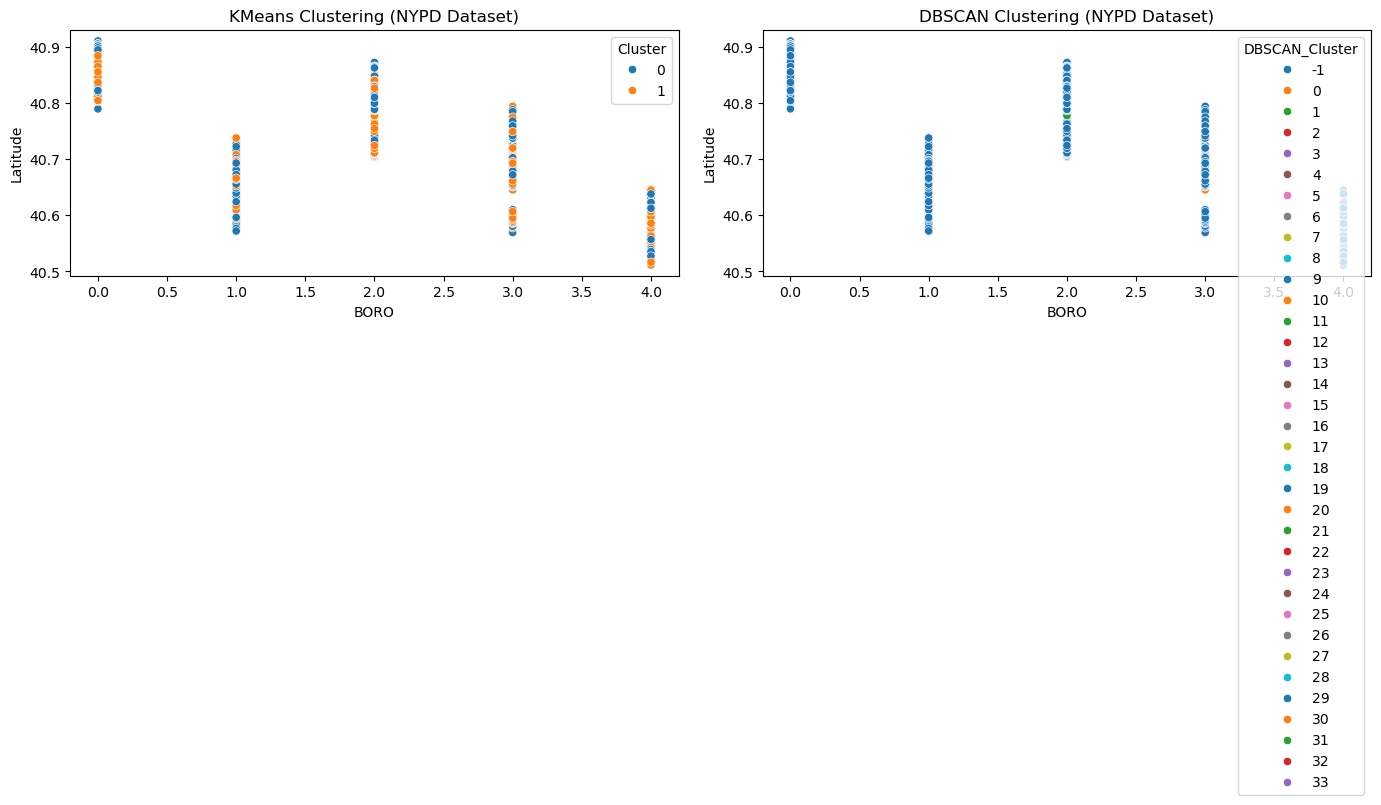

In [51]:
# --- Visualization ---

# Set up a matplotlib figure
plt.figure(figsize=(14, 6))

# Subplot for KMeans
plt.subplot(1, 2, 1)
# Changed 'KMeans_Cluster' to 'Cluster' to reflect column name in df12
sns.scatterplot(x='BORO', y='Latitude', hue='Cluster', palette='tab10', data=data, legend='full')
plt.title('KMeans Clustering (NYPD Dataset)')
plt.xlabel('BORO')
plt.ylabel('Latitude')


# Subplot for DBSCAN
plt.subplot(1, 2, 2)
sns.scatterplot(x='BORO', y='Latitude', hue='DBSCAN_Cluster', palette='tab10', data=data, legend='full')
plt.title('DBSCAN Clustering (NYPD Dataset)')
plt.xlabel('BORO')
plt.ylabel('Latitude')

# Display the plots
plt.tight_layout()
plt.show()